In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
train_data=pd.read_csv('SalaryData_train.csv')
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_data=pd.read_csv('SalaryData_test.csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


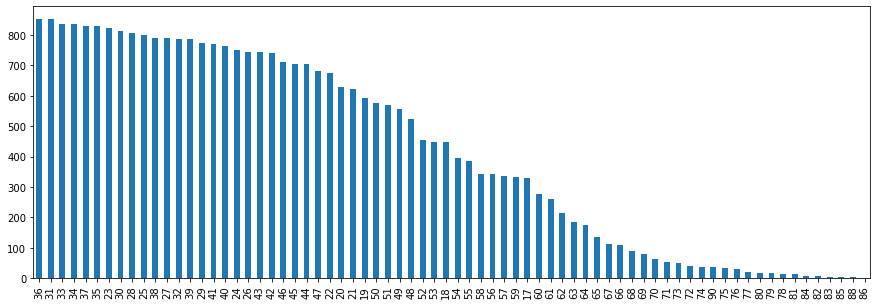

In [4]:
plt.figure(figsize=(15,5))
train_data.age.value_counts().plot.bar();

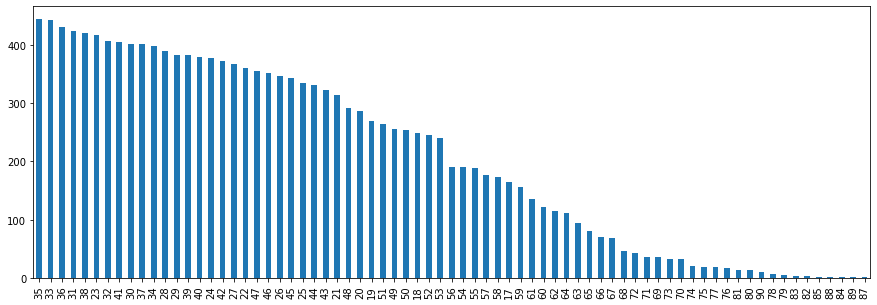

In [5]:
plt.figure(figsize=(15,5))
test_data.age.value_counts().plot.bar();

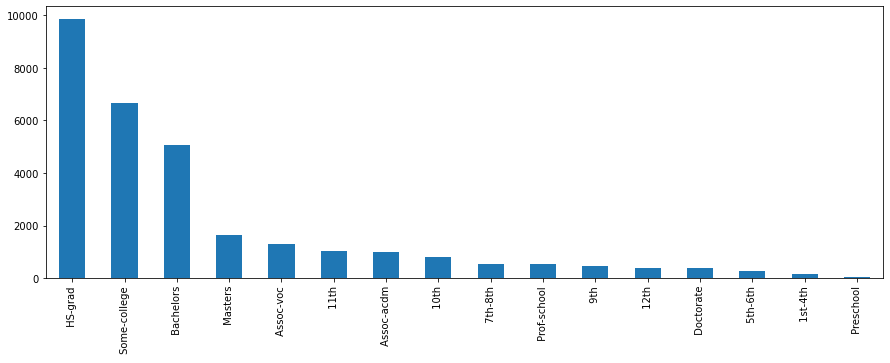

In [6]:
plt.figure(figsize=(15,5))
train_data.education.value_counts().plot.bar();

<AxesSubplot:>

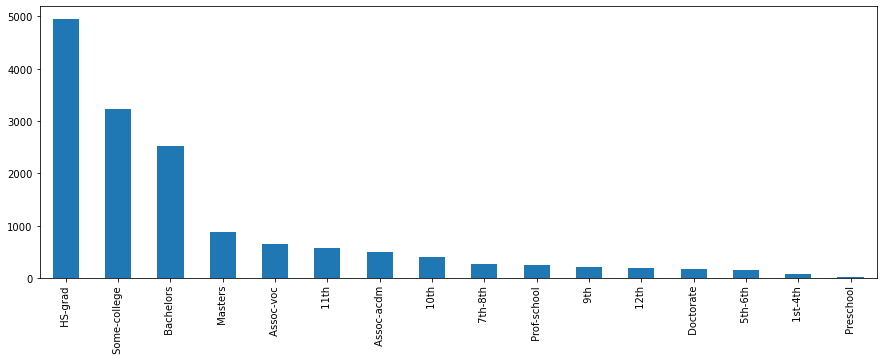

In [7]:
plt.figure(figsize=(15,5))
test_data.education.value_counts().plot.bar()

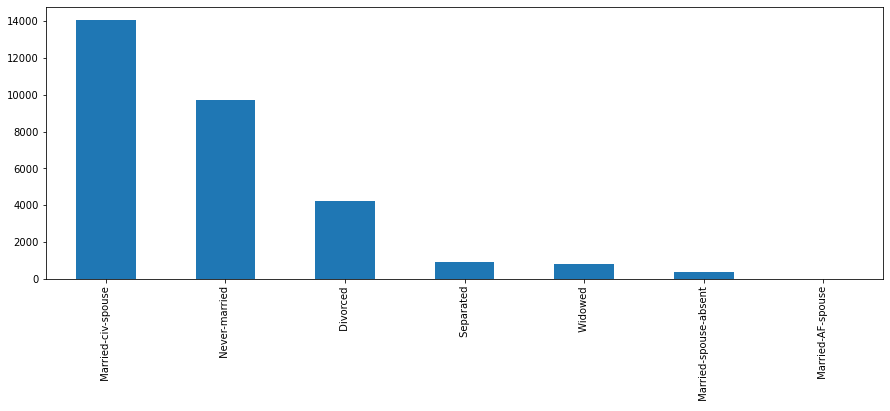

In [8]:
plt.figure(figsize=(15,5))
train_data.maritalstatus.value_counts().plot.bar();

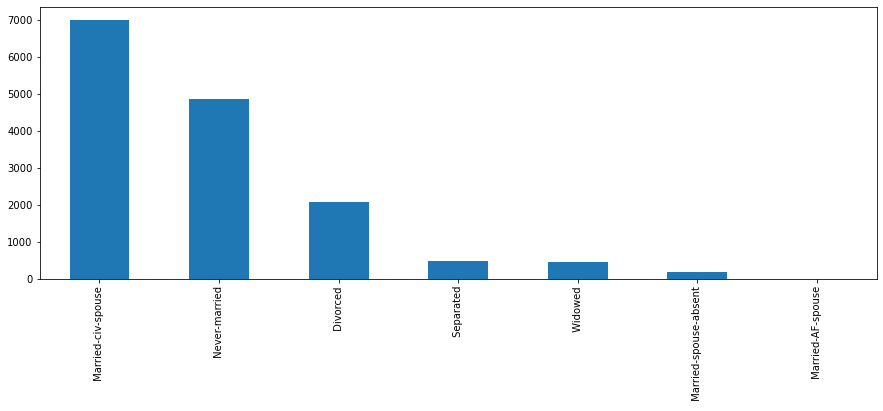

In [9]:
plt.figure(figsize=(15,5))
test_data.maritalstatus.value_counts().plot.bar();

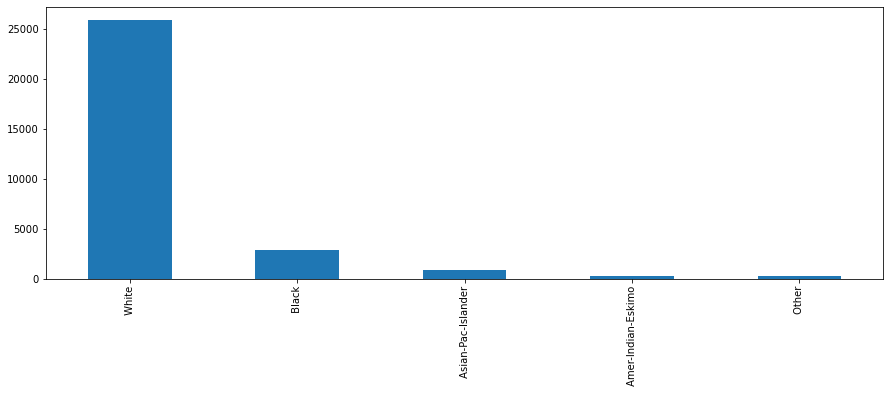

In [10]:
plt.figure(figsize=(15,5))
train_data.race.value_counts().plot.bar();

<AxesSubplot:>

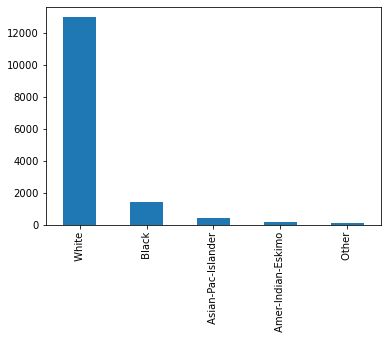

In [11]:
test_data.race.value_counts().plot.bar()

<AxesSubplot:>

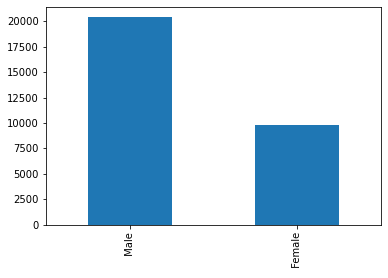

In [12]:
train_data.sex.value_counts().plot.bar()

<AxesSubplot:>

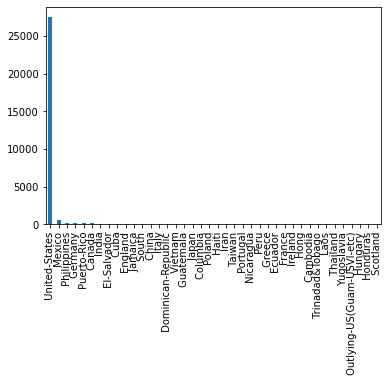

In [13]:
train_data.native.value_counts().plot.bar()

<AxesSubplot:>

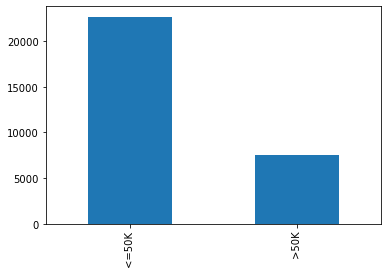

In [14]:
train_data.Salary.value_counts().plot.bar()

In [59]:
x_train_data=train_data.drop(['Salary'],axis=1)
x_train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [60]:
x_test_data=test_data.drop(['Salary'],axis=1)
x_test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [61]:
y_train_data=train_data['Salary']
y_train_data.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary, dtype: object

In [62]:
y_test_data=test_data['Salary']
y_test_data.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: Salary, dtype: object

In [63]:
import category_encoders as ce

In [65]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(x_train_data)

X_test = encoder.fit_transform(x_test_data)



C:\Users\HP\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\HP\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [38]:
from sklearn.impute import SimpleImputer

In [39]:
rep_0=SimpleImputer(missing_values=0,strategy="mean")

In [40]:
rep_0

SimpleImputer(missing_values=0)

In [43]:
X_test.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,38.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,28.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,44.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,34.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [55]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X_test)
X_standardized_test = a.fit_transform(x_test_data)

X_standardized_train=a.fit_transform(x_train_data)


In [75]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
#multinomial naive bayes
model=GB()
model.fit(X_train,y_train_data)
saurabh=model.fit(X_train,y_train_data).predict(X_train)
predict_train=model.predict(X_train)
accuracy_train=np.mean(predict_train==y_train_data)
print('accuracy_score on train dataset : ', accuracy_train)
saurabh1=model.fit(X_test,y_test_data).predict(X_test)
predict_test=model.predict(X_test)
accuracy_test=np.mean(predict_test==y_test_data)
print('accuracy_score on test dataset : ', accuracy_test)


accuracy_score on train dataset :  0.8031563940187659
accuracy_score on test dataset :  0.8057768924302788


In [83]:
model.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

#### hyperparameter tuning

In [76]:
np.logspace(0,9, num=10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

In [77]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [78]:
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [79]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X_test)
X_standardized = a.transform(X_test)

In [80]:
model.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [84]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,9, num=100)}
gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=10,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test_data);



Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV 1/15; 1/100] START var_smoothing=1.0........................................
[CV 1/15; 1/100] END ......................var_smoothing=1.0; total time=   0.0s
[CV 2/15; 1/100] START var_smoothing=1.0........................................
[CV 2/15; 1/100] END ......................var_smoothing=1.0; total time=   0.0s
[CV 3/15; 1/100] START var_smoothing=1.0........................................
[CV 3/15; 1/100] END ......................var_smoothing=1.0; total time=   0.0s
[CV 4/15; 1/100] START var_smoothing=1.0........................................
[CV 4/15; 1/100] END ......................var_smoothing=1.0; total time=   0.0s
[CV 5/15; 1/100] START var_smoothing=1.0........................................
[CV 5/15; 1/100] END ......................var_smoothing=1.0; total time=   0.0s
[CV 6/15; 1/100] START var_smoothing=1.0........................................
[CV 6/15; 1/100] END ......................v

In [85]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])

In [86]:
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [89]:
from sklearn.metrics import accuracy_score
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test_data,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8069721115537849
